In [1]:
from data_processing import process_mat_file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from climate_stats import ClimateStats

In [2]:
input_data_path = "/Users/cooper/Desktop/climate-impacts/data/Input_data.mat"
path_exp_first = '/Users/cooper/Desktop/climate-impacts/data/Exponential/Seperated_FirstOrder_Exp_1500(30).mat'

In [3]:
present_data = process_mat_file(input_data_path)
exp_first_data = process_mat_file(path_exp_first)

In [4]:
present_data

,Precipitation,T_max,T_min,T_avg,Year,Month,Day
0,0.4,1.5,-10.1,-4.30,1986,Jan,1
1,5.9,4.1,-2.0,1.05,1986,Jan,2
2,0.0,4.1,-3.1,0.50,1986,Jan,3
3,7.8,-0.3,-11.7,-6.00,1986,Jan,4
4,0.0,1.4,-10.1,-4.35,1986,Jan,5
...,...,...,...,...,...,...,...
12405,13.7,3.4,-1.1,1.15,2019,Dec,27
12406,0.4,2.2,-3.6,-0.70,2019,Dec,28
12407,0.0,5.7,-3.2,1.25,2019,Dec,29
12408,0.0,7.8,1.1,4.45,2019,Dec,30


In [5]:
exp_first_data

,Precipitation,T_max,T_min,T_avg,Year,Month,Day,Simulation
0,1.052159,0.575836,-3.966348,-1.695256,1980,Jan,1,1
1,2.840043,2.131566,-2.196253,-0.032343,1980,Jan,2,1
2,0.000000,0.337740,-2.734396,-1.198328,1980,Jan,3,1
3,0.000000,4.614041,0.185355,2.399698,1980,Jan,4,1
4,2.044771,2.277004,-3.072299,-0.397647,1980,Jan,5,1
...,...,...,...,...,...,...,...,...
547495,13.138856,-2.289081,-9.061114,-5.675098,2009,Dec,27,50
547496,7.726682,-2.705927,-8.001282,-5.353604,2009,Dec,28,50
547497,5.920434,-0.570781,-7.474422,-4.022602,2009,Dec,29,50
547498,0.000000,1.047279,-5.964266,-2.458494,2009,Dec,30,50


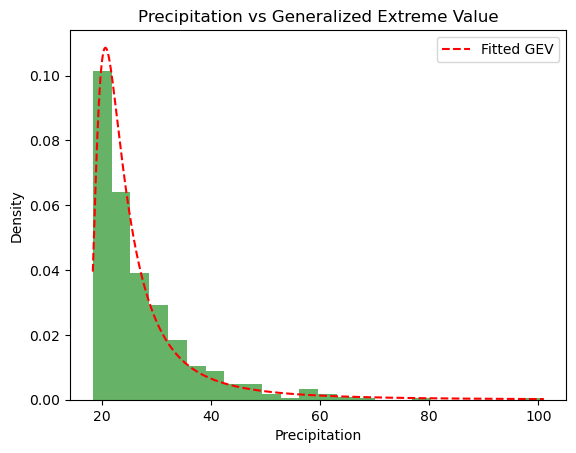

In [8]:
present_stats = ClimateStats(present_data)

c, loc, scale = present_stats.fit_genextreme('Precipitation', 0.95)
present_stats.plot_hist_vs_genextreme('Precipitation', c=c, loc=loc, scale=scale)

present_stats_params = {
    'Precipitation': {
        'c': c,
        'loc': loc,
        'scale': scale
    }
}

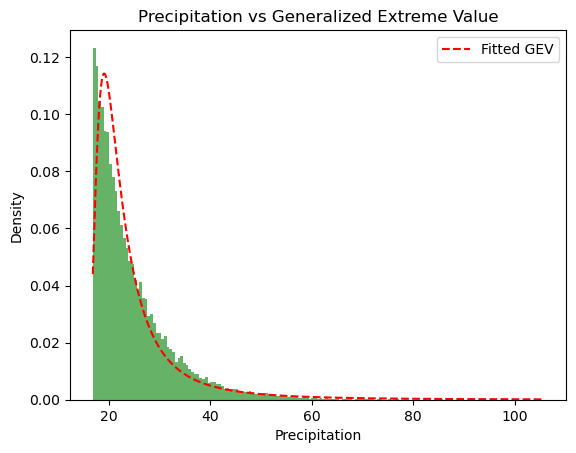

In [9]:
exp_first_stats = ClimateStats(exp_first_data)

c, loc, scale = exp_first_stats.fit_genextreme('Precipitation', 0.95)
exp_first_stats.plot_hist_vs_genextreme('Precipitation', c=c, loc=loc, scale=scale)

exp_first_stats_params = {
    'Precipitation': {
        'c': c,
        'loc': loc,
        'scale': scale
    }
}

In [14]:
# Comparing parameters
present_params = pd.DataFrame(present_stats_params)
exp_first_params = pd.DataFrame(exp_first_stats_params)

params = pd.concat([present_params, exp_first_params], axis=1)
params.columns = ['Present', 'Exponential']
params['precent_change'] = np.abs((params['Exponential'] - params['Present']) / params['Present'] * 100)
params


,Present,Exponential,precent_change
c,-0.530303,-0.490934,7.423897
loc,22.161532,20.438750,7.773749
scale,3.823345,3.573868,6.525097
